#### Importing required libraries

In [2]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 74.0/74.0 MB 5.7 MB/s eta 0:00:00
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


In [4]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-1.7.5-py3-none-win_amd64.whl (70.9 MB)


In [20]:
# Basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries required for model training

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [6]:
# Import CSV data as pandas Dataframe

df = pd.read_csv('data/stud.csv')
df.head() # top 5 data points

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
X = df.drop(columns=['math_score'],axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
print("Categories in 'gender' variable: ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [10]:
y = df['math_score'] # Consider 'math_score' as dependent variable

In [16]:
# Crete pipeline of Onehotencoder and Standardscalar using ColumnTransformer
# OneHotEncoder --> For converting categorical features into numeric
# StandardScalar --> applicable for nuumerical features

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

cat_trans = OneHotEncoder()
num_trans = StandardScaler()

preprocessor = ColumnTransformer(
    [
    ("OneHotEncoder", cat_trans,cat_features),
    ("StandardScalar", num_trans,num_features)
    ]
)

In [17]:
X = preprocessor.fit_transform(X)

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [18]:
X.shape

(1000, 19)

In [21]:
# Splitting dataset intro train and test set

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)

(800, 19)
(200, 19)


In [52]:
# Build evaluate function to evaluate model performance after training the model
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae,rmse, r2_square

In [53]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbor Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # Train model

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test set
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for training set:")
    print("- Root Mean Squared error:{:.3f}".format(model_train_rmse))
    print("- Mean Absolute Error:{:.3f}".format(model_train_mae))
    print("- R2 Score:{:.3f}".format(model_train_r2))

    print("-------------------------------------")

    print("Model performance for testing set:")
    print("- Root Mean Squared error:{:.3f}".format(model_test_rmse))
    print("- Mean Absolute Error:{:.3f}".format(model_test_mae))
    print("- R2 Score:{:.3f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    
    print("__"*20)
    print("\n")

Linear Regression
Model performance for training set:
- Root Mean Squared error:5.326
- Mean Absolute Error:4.271
- R2 Score:0.874
-------------------------------------
Model performance for testing set:
- Root Mean Squared error:5.389
- Mean Absolute Error:4.206
- R2 Score:0.881
________________________________________


Lasso
Model performance for training set:
- Root Mean Squared error:6.594
- Mean Absolute Error:5.206
- R2 Score:0.807
-------------------------------------
Model performance for testing set:
- Root Mean Squared error:6.520
- Mean Absolute Error:5.158
- R2 Score:0.825
________________________________________


Ridge
Model performance for training set:
- Root Mean Squared error:5.323
- Mean Absolute Error:4.265
- R2 Score:0.874
-------------------------------------
Model performance for testing set:
- Root Mean Squared error:5.390
- Mean Absolute Error:4.211
- R2 Score:0.881
________________________________________


K-Neighbor Regressor
Model performance for training 

#### Results

In [57]:
list(zip(model_list,r2_list))

[('Linear Regression', 0.8806417491000957),
 ('Lasso', 0.8253197323627852),
 ('Ridge', 0.880593148502874),
 ('K-Neighbor Regressor', 0.7845181853747702),
 ('Decision Tree', 0.7458683052078916),
 ('Random Forest Regressor', 0.8488395294437765),
 ('CatBoosting Regressor', 0.8516318920747058),
 ('XGBRegressor', 0.8215894515233413),
 ('AdaBoost Regressor', 0.8574573549300678)]

In [58]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.880642
2,Ridge,0.880593
8,AdaBoost Regressor,0.857457
6,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.848840
1,Lasso,0.825320
7,XGBRegressor,0.821589
3,K-Neighbor Regressor,0.784518
4,Decision Tree,0.745868


#### Linear Regression

In [60]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of model: {:.3f}".format(score))

Accuracy of model: 88.064


#### Plot (predicted vs actual)

Text(0, 0.5, 'Predicted')

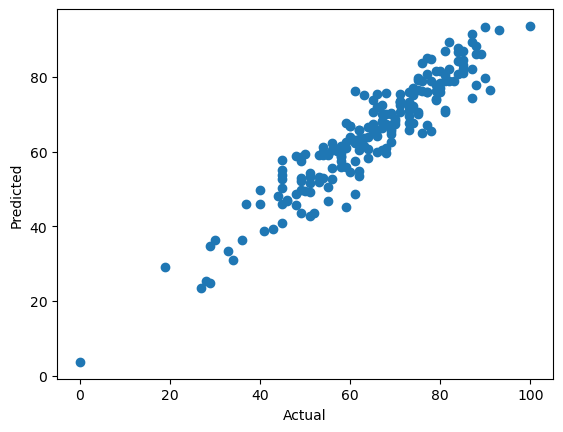

In [61]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<AxesSubplot:xlabel='math_score'>

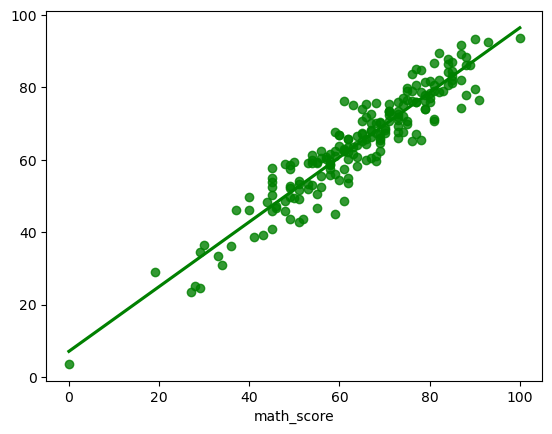

In [63]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='green')

#### Difference between Actuual and Predicted values (Error)

In [64]:
pred_df = pd.DataFrame({'Actual value':y_test,
                        'Predicted value':y_pred,
                        'Difference':y_test-y_pred})
pred_df

,Actual value,Predicted value,Difference
521,91,76.453125,14.546875
737,53,59.000000,-6.000000
740,80,76.968750,3.031250
660,74,76.968750,-2.968750
411,84,87.812500,-3.812500
...,...,...,...
408,52,43.546875,8.453125
332,62,62.250000,-0.250000
208,74,67.750000,6.250000
613,65,67.046875,-2.046875
